# Day 17: In-class Assignment: Modeling with ODEs

### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>

#### <p style="text-align: right;"> &#9989; Tori, Allison, Olivia, Bella</p>

<img src="https://static.vecteezy.com/system/resources/previews/000/155/797/non_2x/vector-bungee-jumper-falling-in-fear.jpg" width= 400><p style="text-align: right;">
</p>

### Goals for Today's In-Class Assignment
By the end of this assignment, you should be able to:
* Use functions to define derivatives that model the evolution of a physical system.
* Use loops to update the state of an evolving system.
* Use `solve_ivp` to model a physical system
* Use <code>matplotlib</code> to plot the evolution of the system.
* Use NumPy when necessary to manipulate arrays or perform mathematical operations
* Compare the differences between different numerical solutions to ODEs

### Assignment instructions

Today, **with your group**, you're going to try to apply what you've learned in the pre-class assignment to solve ODEs to model a physical system.

**This assignment is due at the end of class** and should be uploaded into the appropriate "In-class Assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---
## Review from Preclass

For reference, here are the differential equations of motion we used for the skydiver in the pre-class assignment:

We know that the **change in height** over some **change in time** is the **velocity** of the sky-diver, which we can write as:

$$ \frac{dh}{dt} = v$$

where we can think of **dh** as some small change in the height and **dt** is some small change in time. 

Similarly, a **change in velocity** over **change in time** is the **acceleration**, which we can write as:

$$ \frac{dv}{dt} = a$$

Now, if we combine these equations with the **initial conditions** of the skydiver, we have what is often referred to as an **initial value problem**.

If we want to solve this system **numerically**, one way that we can do it is to use a set of **"update equations"**, that allow us to move the skydiver from one point in time to another. The simplest set of update equations we can use are the following:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + \frac{dh}{dt}\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + \frac{dv}{dt}\Delta t$$

and we said that 



\begin{eqnarray}
\frac{dh}{dt} &=& v \\ \\
\frac{dv}{dt} &=&  \frac{-0.65~A~v~\left|v\right|}{m} + g
\end{eqnarray}


Where the first term in our expression for $\frac{dv}{dt}$ was from air drag and the second term from gravity. 

---
# Modeling a bungee jumper

Building off of what you saw in your pre-class assignment, you're going to model the motion of a bungee jumper with and without air resistance. 

For those of you who might not be familiar with Bungee Jumping, check out the Wikipedia article [here](https://en.wikipedia.org/wiki/Bungee_jumping). We will draw from our model for the sky-diver to solve this problem; however, we'll need to add the bungee-cord to our model.

In the bungee jumping model, the cord itself acts as a **spring**, which provides the restoring force necessary for the bungee jumper to travel back upward once it reaches the bottom of the jump. **This will add another term to our expression for $\frac{dv}{dt}$**, specifically:

$$\frac{dv_{\mathrm{spring}}}{dt} = \frac{-k~(l-l_{unstretched})}{m}$$

where 

1. **The displacement is defined to be $l - l_{\mathrm{unstretched}}$**, where $l_{\mathrm{unstretched}}$, is the natural length of the spring when it is neither stretched or compressed 
    * The length, $l$, will change as the bungee jumper moves. The unstretched length, $l_{unstretched}$, will be constant, it does not change as the bungee jumper moves
2. **Natural length (neither stretched or compressed) of the bungee cord/spring**, is $l_{\mathrm{unstretched}} = 30.0$ m. 
3. $k$ is the **spring constant**. For this problem we'll say that **$k = 6.0$**
4. $m$ is the **mass of the thing attached to the spring (in this case, the mass of the bungee jumper)**

**Important Note:** In reality, a bungee cord never pushes the jumper downward, but we're going to make the assumption that the bungee cord acts like a rigid spring to simplify the problem. So, in our model, when the jumper is at the top of the jump they feel a force downward due to fact that the "spring" is in a compressed state. **Any time you compute $\frac{dv}{dt}$, you'll want to make sure you include $\frac{dv_{\mathrm{spring}}}{dt}$**

#### You're going to model the **length**, $l$, of the bungee cord (not the height of the bungee jumper). 

---
## Solving the ODEs using update equations

For your first solution, you're going to model the motion of the bungee jumper *using loops and update equations*. 

&#9989;&nbsp; **As a group**, design a model (system of equations) that describe the motion of the bungee jumper both with and without air resistance.

You and your groups members are expected to **use your whiteboard to create this model.**. 

*Things to think about:*
- What are your key variables?  
- What will your equations for $v$ and $\frac{dv}{dt}$ look like? 
- How will you translate these equations into code? 
- How will you incorporate your equation code into the solution for the skydiver model?

**Two things to note**
1. When modeling the length of the bungee cord, gravity acts to extend the cord, so the acceleration due to gravity should be considered a **positive value**, *which is different than the skydiver problem.*
2. A **solution for the skydiver model using update equations** from the pre-class assignment is included at the end of this notebook if you would like to use it as a reference or as the foundation for your new code.

<font size="+3">&#9998;</font> _Put the pseudocode for your model here; Discuss your key variables; Basic equations; Steps to solve this problem_

---
&#9989;&nbsp; Once you have a plan, translate it into code. Again, you should *use loops and update equations* to solve the problem.  You should **make a plot of the bungee cord length and the velocity as a function of time.**

The values you should use in your model are:
- A projected area, $A$, of 0.1 m$^2$
- A mass, $m$, of 80 kg
- Assume that initially, $l=0$ and that this represents the time when the bungee jumper is at their highest point (i.e., right before they jump)
- Assume that initially, your velovity, $v=0$, because the bungee jumper has not started moving yet. 
- Finally, use 0.1 seconds as your time step size ($dt$), and run your model for a total of 60 seconds.

In [5]:
# Put your code here

A = 0.1
t = 0.1
m = 80
l = 0 
v = 0
g = -9.8

def derivs (v,g):
    dhdt = v
    dvdt = g
# Initialize lists for storing data
height = []
velocity = []
time = []
acceleration = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)
acceleration.append(g)

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    acceleration.append(dvdt)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity/acceleration vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

plt.figure(3)
plt.plot(time, acceleration, color = 'orange')
plt.xlabel('Time [seconds]')
plt.ylabel('Acceleration [meters/second^2]')
plt.grid()

TypeError: cannot unpack non-iterable NoneType object

When successful, your plots with no air resistance (the undamped oscillator) should look something like this.  

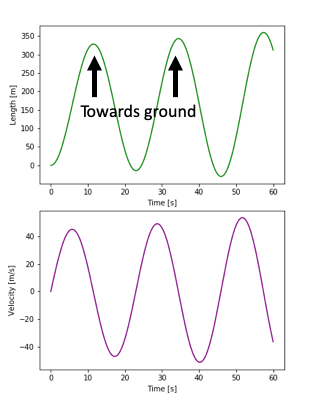

&#9989;&nbsp; **Question**: Do your results make sense? How does adding air resistance change the results?  If the bungee jumper jumps from a bridge that is 200 meters above the ground, will they survive the jump?

<font size=+3>&#9998;</font> *Put your answers here.*

---
## Solving the ODEs using solve_ivp

Above, you performed numerical update equations to solve for length and velocity. For your second solution, you're going to model the motion of the bungee jumper using `solve_ivp`, a flexible python solution for these types of problems (systems modeled with 1st order differential equations).

The basic anatomy for the use of `solve_ivp` can be seen here:

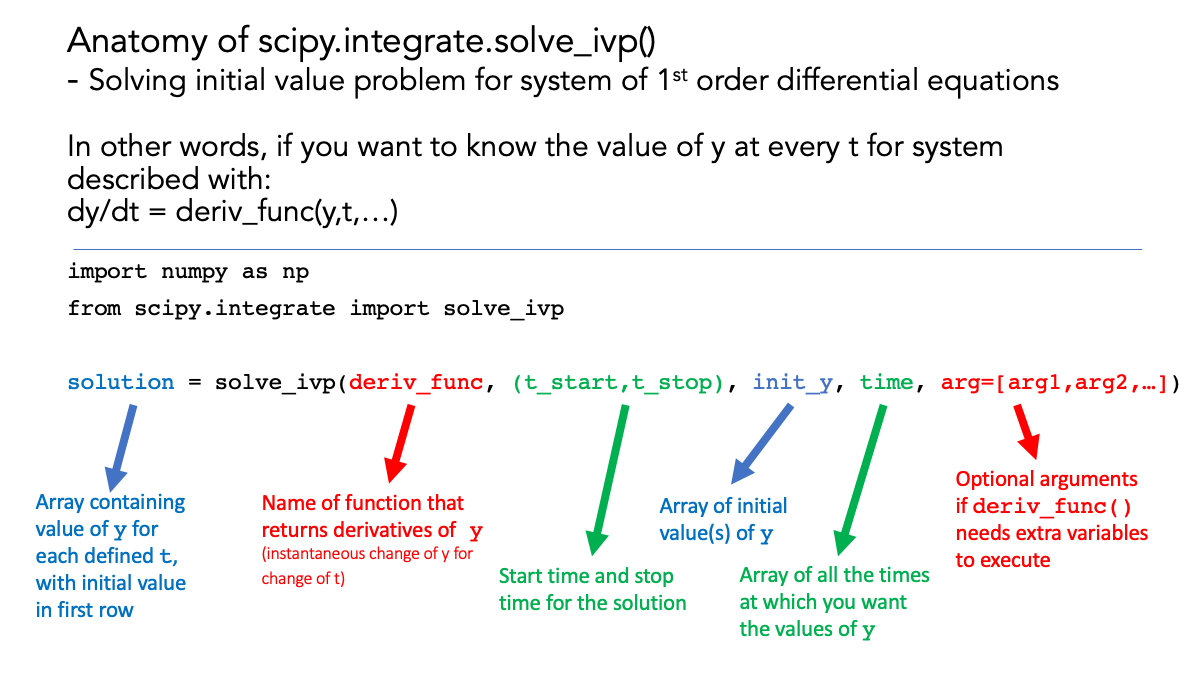

&#9989;&nbsp; **Once you have a working model, you should make a plot of the bungee cord length and the velocity as a function of time**.

**Note**: You should be able to use what you figured out from the update equation solution to help guide your `solve_ivp` solution.

**As before, try modeling the solution both with an without air resistance and see how the results change.**

**An `solve_ivp` solution for skydiver model from the pre-class assignment is included at the end of this notebook if you would like to use it as a reference or as the foundation for your new code.**

In [ ]:
# Put your pseudocode and code here


---
## Comparing your solutions

Now that you have functional solutions using both the update equations and `solve_ivp`, you should compare your results from the two different methods.

&#9989;&nbsp; **In the same plot, plot the position as a function of time from both your update equation solution and your `solve_ivp` solution. Make a separate plot for both velocity solutions as well.**

In [ ]:
# Put your plotting code here

# Declare Variables for initial conditions
h0 = 2000 # meters ### MODIFIED CODE
v0 = 0 # m/s
g = -9.81 # m/s^2
tmax = 30 # seconds ### MODIFIED CODE
dt = 0.1 # seconds ### MODIFIED CODE

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs, (0,tmax),init,t_eval = time)

# Unpack the results stored in the solution variable, "sol"


h = sol.y[0,:]
v = sol.y[1,:]
t = sol.t

# Plot the results we unpacked from "sol"

plt.figure(1)
plt.plot(t,h,color = 'green')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

plt.figure(2)
plt.plot(t,v, color = 'purple')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

&#9989;&nbsp; **Question**: Do the results from your two different methods agree? If they don't, how do they differ? What happens as you change the size of the timesteps? How do the solutions compare when you go to larger time steps? smaller time steps?

<font size=+3>&#9998;</font> The differ because the solve_ivp is a lot less intenstive and it does not require nearly as much hard coding than the other approach

&#9989;&nbsp; **Question**: Which of the two methods for modeling this system do you prefer? Which one felt like more work to get working? For the one that required more work, were there benefits to doing that work or drawbacks? Leave your responses in the cell below.

<font size=+3>&#9998;</font> *Put your answers here.*

---



# Example solutions to the skydiver problem
---
## Solution to the skydiver problem using update equations

The following code provides a solution to the skydiver problem using update equations for the case when air resistance is included.

In [1]:
# Create a function to compute derivaives of velocity and height
def derivs(v,g):
    # Define some variables for the air resistance
    A = 0.4 # m^2
    m = 80.0 # kg
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is acceleration (gravity in this e.g.)
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

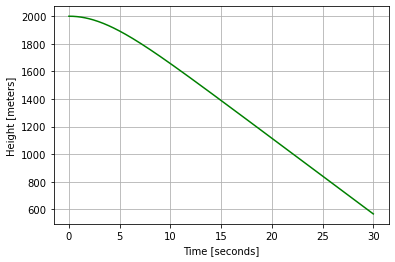

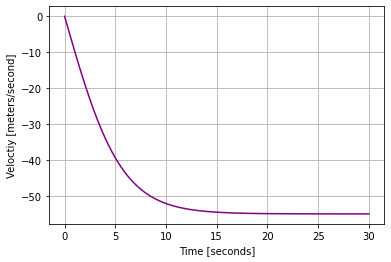

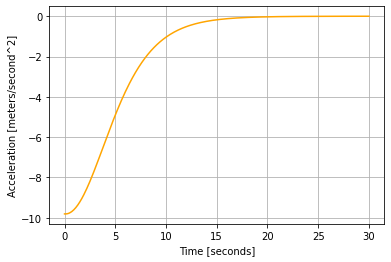

In [2]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize variables
h = 2000 # initial height; m
v = 0 # initial velocity; m/s 
g = -9.81 # gravity; m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 0.1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []
acceleration = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)
acceleration.append(g)

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    acceleration.append(dvdt)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity/acceleration vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

plt.figure(3)
plt.plot(time, acceleration, color = 'orange')
plt.xlabel('Time [seconds]')
plt.ylabel('Acceleration [meters/second^2]')
plt.grid()

## Solution to the skydiver problem using solve_ivp

The following code provides a solution to the skydiver problem using `solve_ivp` for the case when air resistance is included.

In [3]:
# Derivative function
def derivs(time,curr_vals):
    
    # Declare parameters
    g = -9.81 # m/s^2
    A = 0.4 # m^2 ### NEW CODE
    m = 80.0 # kg ### NEW CODE
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to compute the derivative
    dhdt = v
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

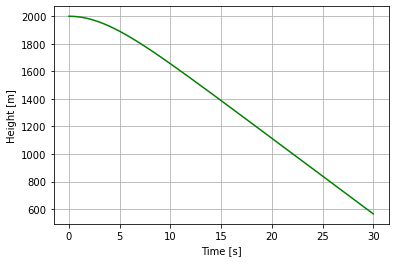

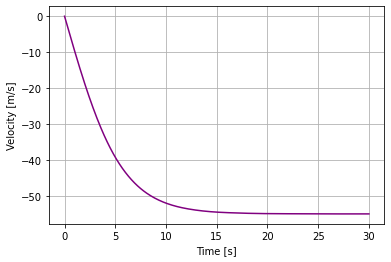

In [4]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!


# Declare Variables for initial conditions
h0 = 2000 # meters ### MODIFIED CODE
v0 = 0 # m/s
g = -9.81 # m/s^2
tmax = 30 # seconds ### MODIFIED CODE
dt = 0.1 # seconds ### MODIFIED CODE

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs, (0,tmax),init,t_eval = time)

# Unpack the results stored in the solution variable, "sol"


h = sol.y[0,:]
v = sol.y[1,:]
t = sol.t

# Plot the results we unpacked from "sol"

plt.figure(1)
plt.plot(t,h,color = 'green')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

plt.figure(2)
plt.plot(t,v, color = 'purple')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [1]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2018,  Michigan State University Board of Trustees